
# TC Dataset Analysis
This sample script illustrates how to read in, visualize and analyze HURDAT2 and IBTrACS tropical cyclone databases.


In [2]:
import tropycal.tracks as tracks
import datetime as dt

## HURTDAT2 Dataset
Let's start with the HURDAT2 dataset by loading it into memory. By default, this reads in the HURDAT dataset from the National Hurricane Center (NHC) website, unless you specify a local file path using either ``atlantic_url`` for the North Atlantic basin on ``pacific_url`` for the East & Central Pacific basin.

HURDAT data is not available for the most recent hurricane seasons. To include the latest data up through today, the "include_btk" flag would need to be set to True, which reads in preliminary best track data from the NHC website.

Let's create an instance of a TrackDataset object, which will store the North Atlantic HURDAT2 dataset in memory. Once we have this we can use its methods for various types of analyses.



In [3]:
basin = tracks.TrackDataset(basin='north_atlantic',source='hurdat',include_btk=False)

--> Starting to read in HURDAT2 data
--> Completed reading in HURDAT2 data (0.87 seconds)


We can quickly check to see what the dataset contains by printing the object:



In [4]:
print(basin)

<tropycal.tracks.Dataset>
Dataset Summary:
    Basin:             north_atlantic
    Source:            hurdat
    Number of storms:  1952
    Maximum wind:      165 knots (Allen 1980)
    Minimum pressure:  882 hPa (Wilma 2005)
    Year range:        1851 — 2022


Alternatively, converting the basin to a Pandas DataFrame provides more information about each season contained in this basin.



In [5]:
basin.to_dataframe()

all_storms  named_storms  hurricanes  major_hurricanes    ace  \
season                                                                  
1851             6             6           3                 1   36.1   
1852             5             5           5                 1   73.4   
1853             8             8           4                 2   76.4   
1854             5             5           3                 1   31.1   
1855             5             5           4                 1   18.2   
...            ...           ...         ...               ...    ...   
2018            16            15           8                 2  132.5   
2019            20            18           6                 3  132.3   
2020            31            30          14                 7  180.3   
2021            21            21           7                 4  145.3   
2022            16            14           8                 2   94.7   

                start_time            end_time  
season                                          
1851   1851-06-25 00:00:00 1851-10-19 18:00:00  
1852   1852-08-19 00:00:00 1852-10-11 18:00:00  
1853   1853-08-05 12:00:00 1853-10-22 06:00:00  
1854   1854-06-25 00:00:00 1854-10-22 18:00:00  
1855   1855-08-06 12:00:00 1855-09-17 06:00:00  
...                    ...                 ...  
2018   2018-05-25 12:00:00 2018-10-31 12:00:00  
2019   2019-05-20 18:00:00 2019-11-24 18:00:00  
2020   2020-05-16 18:00:00 2020-11-18 12:00:00  
2021   2021-05-22 06:00:00 2021-11-07 06:00:00  
2022   2022-06-05 00:00:00 2022-11-11 12:00:00  

[172 rows x 7 columns]

### Retrieving storms and seasons

A TrackDataset object can be used to retrieve individual storms and seasons. To retrieve a Storm object, provide either a tuple of the storm name and year (e.g., ``('michael',2018)``), or a string containing the ID of the storm (e.g., ``'AL012020'``):



In [6]:
#Retrieve Hurricane Michael from 2018
storm = basin.get_storm(('michael',2018))

#Printing the Storm object lists relevant data:
print(storm)

<tropycal.tracks.Storm>
Storm Summary:
    Maximum Wind:      140 knots
    Minimum Pressure:  919 hPa
    Start Time:        0600 UTC 07 October 2018
    End Time:          1800 UTC 11 October 2018

Variables:
    time        (datetime) [2018-10-06 18:00:00 .... 2018-10-15 18:00:00]
    extra_obs   (int32) [0 .... 0]
    special     (str) [ .... ]
    type        (str) [LO .... EX]
    lat         (float64) [17.8 .... 41.2]
    lon         (float64) [-86.6 .... -10.0]
    vmax        (int32) [25 .... 35]
    mslp        (int32) [1006 .... 1001]
    wmo_basin   (str) [north_atlantic .... north_atlantic]

More Information:
    id:              AL142018
    operational_id:  AL142018
    name:            MICHAEL
    year:            2018
    season:          2018
    basin:           north_atlantic
    source_info:     NHC Hurricane Database
    source:          hurdat
    ace:             12.5
    realtime:        False
    invest:          False
    subset:          False


To retrieve a season, simply provide the year of the season:



In [7]:
#Retrieve the 2017 Atlantic hurricane season
season = basin.get_season(2017)

#Printing the Season object lists relevant data:
print(season)

<tropycal.tracks.Season>
Season Summary:
    Total Storms:      18
    Named Storms:      17
    Hurricanes:        10
    Major Hurricanes:  6
    Season ACE:        224.8

More Information:
    year:          2017
    basin:         north_atlantic
    source_basin:  north_atlantic
    source:        hurdat
    source_info:   NHC Hurricane Database


If you remember the name of a storm but not the year, there is functionality to search for a list of years containing a storm of the requested name:



In [8]:
print(basin.search_name('Michael'))

[2000, 2012, 2018]


The previous example for a Storm object illustrated how to retrieve a single storm and make a plot of its observed track. This can also be done from a TrackDataset object, using the ``plot_storm()`` method.

Note that you can pass various arguments to the plot function, such as customizing the map and track aspects. Read through the documentation for more customization options.



<GeoAxes: title={'left': 'Hurricane MICHAEL', 'right': '07 Oct 2018 – 11 Oct 2018\n140 kt • 919 hPa • 12.5 ACE'}>

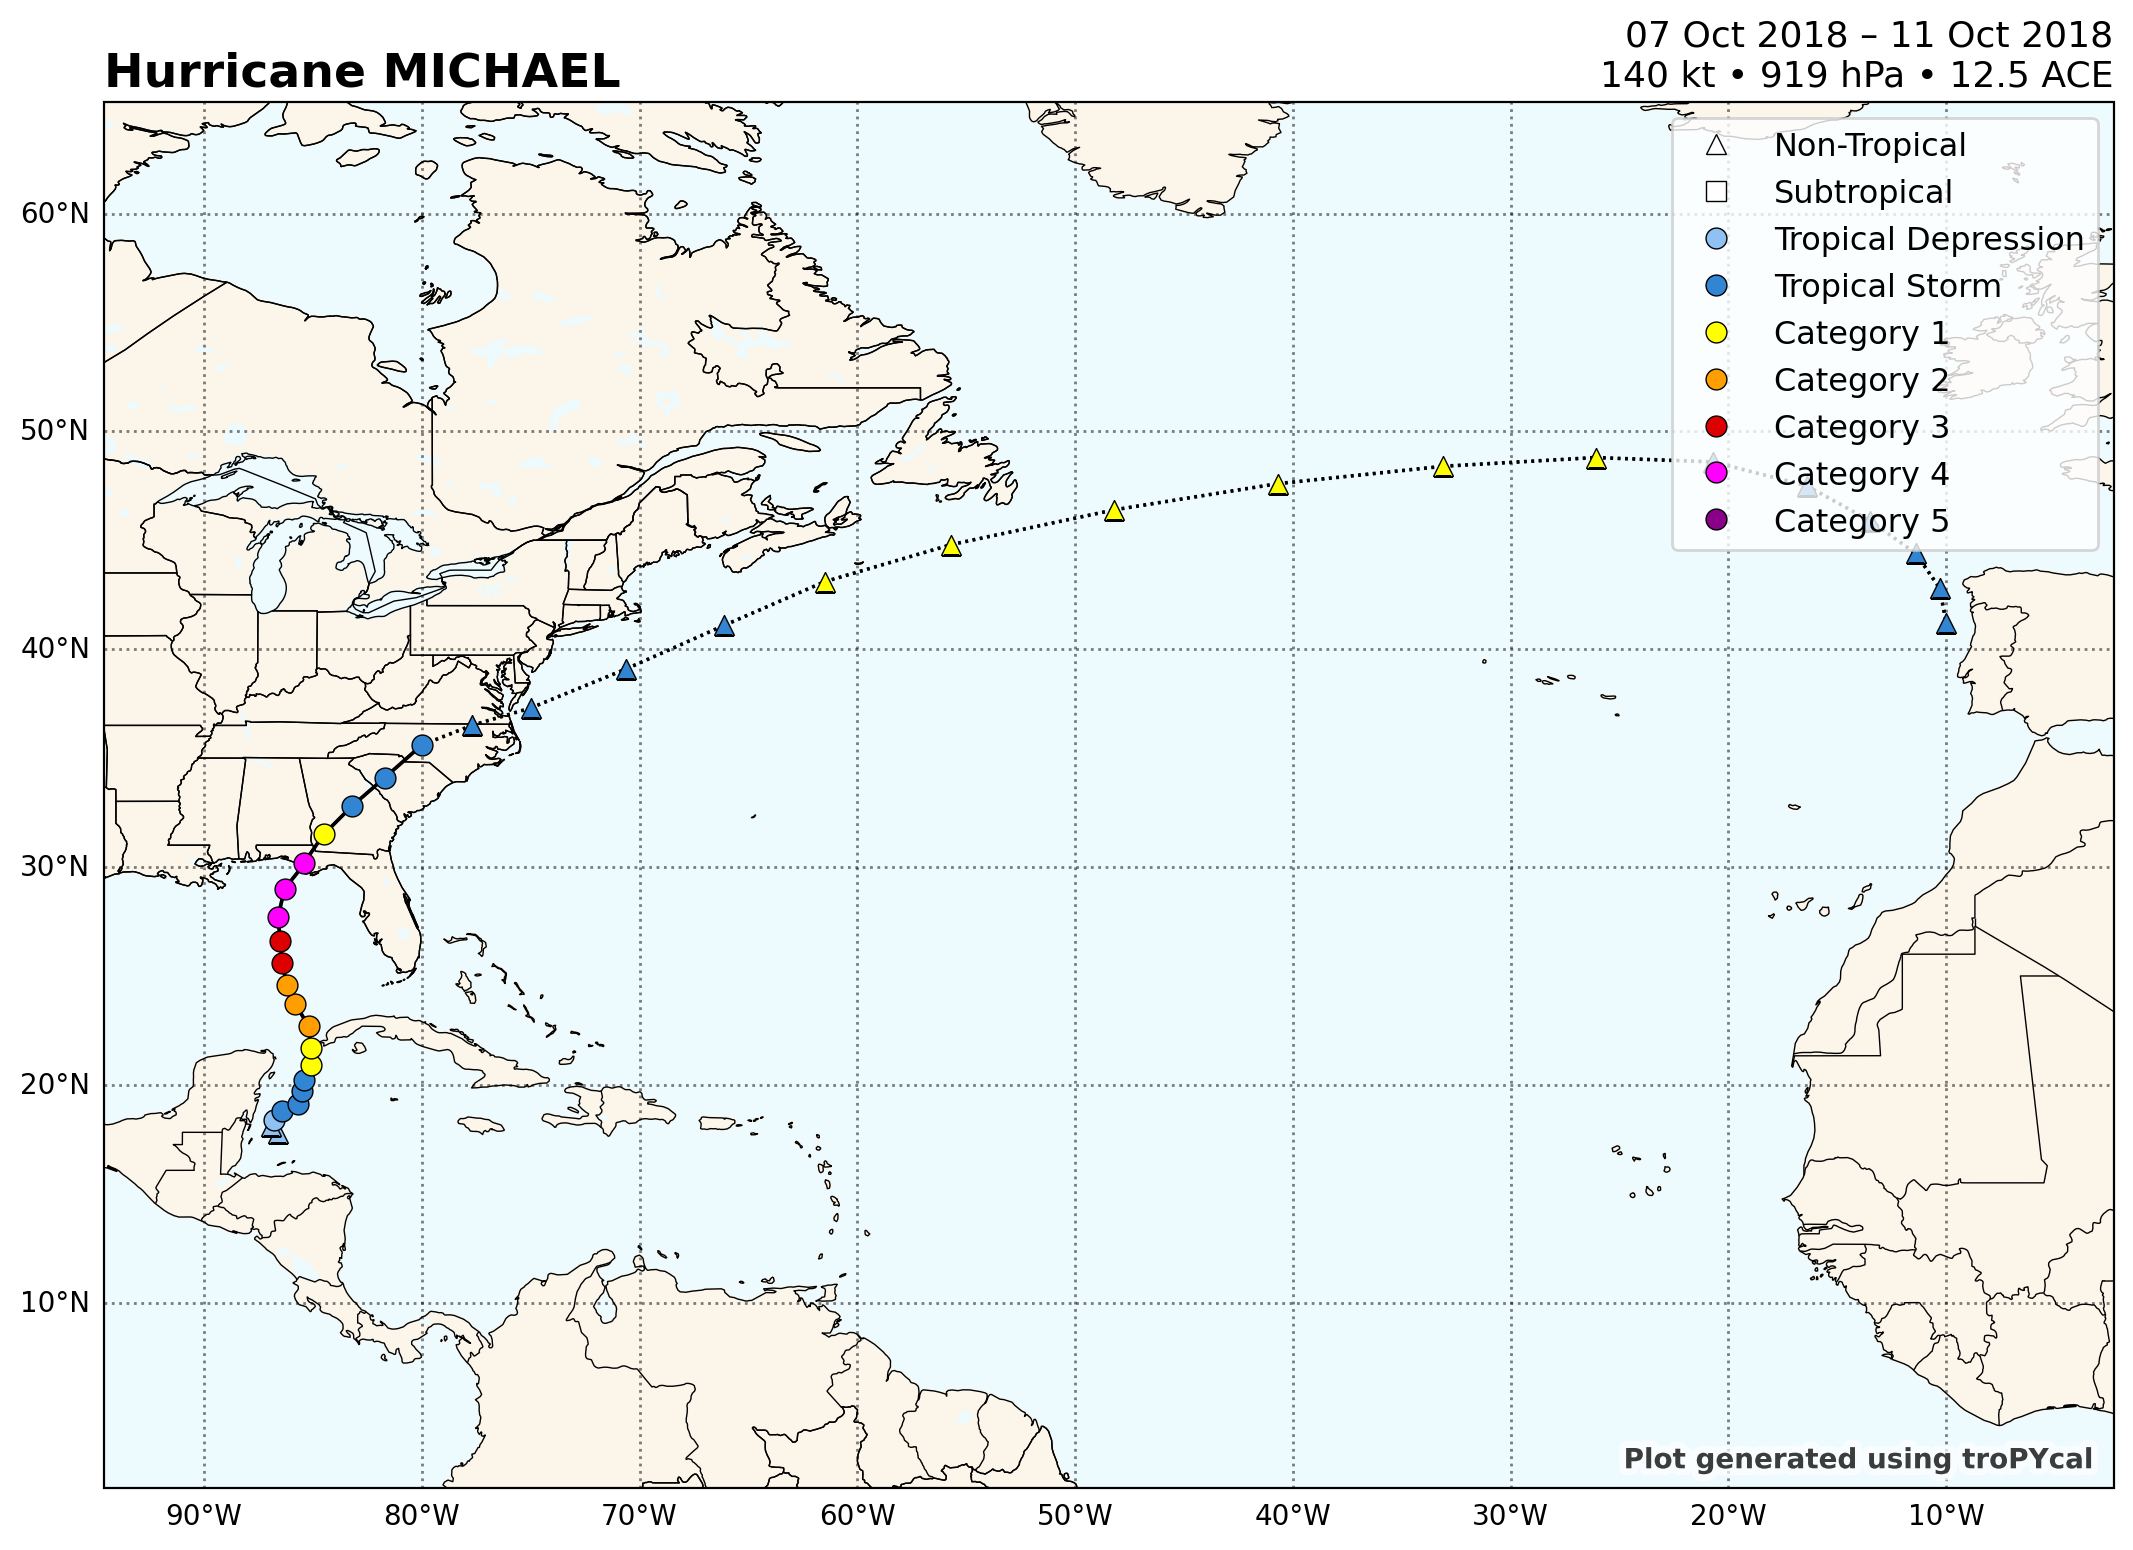

In [13]:
basin.plot_storm(('michael',2018))

A new function added with Tropyal v0.4 is the ability to plot a summary of all ongoing tropical cyclone and NHC Tropical Weather Outlook (TWO) activity across the North Atlantic and East Pacific basins.

Simply plug in a valid date and domain to plot over, and this plot will display all activity at the valid time. There are many customization options for this function detailed more thoroughly in the documentation.



In [14]:
basin.plot_summary(dt.datetime(2020,9,17,0),domain='north_atlantic')

### Climatological analyses

A TrackDataset object can also be used to perform various climatological analyses. We'll start off with basic data analysis, then shift gears to plotting functionality.

First, let's take a look at the climatology for the basin. The default period is 1991-2020, but this can be customized to any range.



In [9]:
basin.climatology(climo_bounds=(1991,2020))

{'all_storms': 16.4,
 'named_storms': 14.6,
 'hurricanes': 7.2,
 'major_hurricanes': 3.3,
 'ace': 123.2,
 'start_time': datetime.datetime(2023, 6, 1, 2, 24),
 'end_time': datetime.datetime(2023, 11, 13, 7, 12)}

Another useful functionality for research or seasonal forecast purposes is to quickly composite multiple hurricane seasons. Simply plug in a list of years, and a year range for the climatology:



In [10]:
basin.season_composite([2004,2005,2008,2010,2017,2020])

{'all_storms': {'list': [16, 31, 17, 21, 18, 31],
  'average': 22.3,
  'composite_anomaly': 5.9,
  'percentile_ranks': [50.0, 98.4, 61.3, 88.7, 67.7, 98.4]},
 'named_storms': {'list': [15, 28, 16, 19, 17, 30],
  'average': 20.8,
  'composite_anomaly': 6.2,
  'percentile_ranks': [56.5, 96.8, 69.4, 85.5, 74.2, 100.0]},
 'hurricanes': {'list': [9, 15, 8, 12, 10, 14],
  'average': 11.3,
  'composite_anomaly': 4.1,
  'percentile_ranks': [74.2, 100.0, 62.9, 93.5, 83.9, 96.8]},
 'major_hurricanes': {'list': [6, 7, 5, 5, 6, 7],
  'average': 6.0,
  'composite_anomaly': 2.7,
  'percentile_ranks': [90.3, 98.4, 79.0, 79.0, 90.3, 98.4]},
 'ace': {'list': [226.7, 250.3, 145.8, 165.5, 224.8, 180.3],
  'average': 198.9,
  'composite_anomaly': 75.7,
  'percentile_ranks': [93.5, 100.0, 67.7, 71.0, 90.3, 83.9]}}

Next we'll take a look at plotting functionality, starting off with doing simple Accumulated Cyclone Energy (ACE) analyses. Let's look at the cumulative year-to-date accumulated cyclone energy, with 2018 highlighted and compared against 2017:



In [ ]:
basin.ace_climo(plot_year=2018,compare_years=2017)

We can use the same function to perform a rolling sum, rather than a year-to-date sum. This highlights particularly active periods of tropical cyclone activity. We'll use the same function as before, but with a ``rolling_sum=30`` argument provided:



In [ ]:
basin.ace_climo(rolling_sum=30,plot_year=2018,compare_years=2017)

Plot cumulative hurricane days for all categories, with 2018 highlighted:



In [ ]:
basin.hurricane_days_climo(plot_year=2018)

Another climatological analysis available is a climatological correlation between maximum sustained wind and minimum mean sea level pressure (MSLP). While both variables are generally well correlated, factors such as background MSLP and MSLP gradient can affect this relationship.

This function plots the climatological correlation and distribution of wind-MSLP relationship, and can also plot individual storms for comparison against the climatology. We'll look at Hurricane Sandy (2012), which started out with a fairly typical wind-MSLP relationship, but towards the end of its life cycle ended up with an anomalously low MSLP given its sustained wind speed as it substantially grew in size.



In [ ]:
basin.wind_pres_relationship(storm=('sandy',2012))

## Gridded Analyses

Tropycal also offers the capability of gridding tropical cyclone data into a structured latitude / longitude grid. This is done via the ``TrackDataset.gridded_stats()`` method. This method accepts multiple input arguments for various types of analyses. This example will show some of these capabilities.

Let's construct a 1 degree grid and plot the maximum sustained wind recorded at each gridpoint:



maximum wind
--> Getting filtered storm tracks
--> Grouping by lat/lon/storm


c:\Users\vy238\OneDrive\Desktop\SUNY\Project 1\py_code\hurricaneKatrina\env_Katrina\Lib\site-packages\tropycal\tracks\tools.py:196: RuntimeWarning: All-NaN slice encountered
  return thresh, lambda x: np.nanmax(x)
c:\Users\vy238\OneDrive\Desktop\SUNY\Project 1\py_code\hurricaneKatrina\env_Katrina\Lib\site-packages\tropycal\tracks\tools.py:196: RuntimeWarning: All-NaN axis encountered
  return thresh, lambda x: np.nanmax(x)


--> Generating plot
average wind change in 24 hours
--> Getting filtered storm tracks
--> Grouping by lat/lon/storm
--> Generating plot


<GeoAxes: title={'left': 'Average wind (kt) change in 24 hours, middle\n≥ 5 storms/bin', 'right': 'Jan 01 – Dec 31 • 1851 – 2022'}>

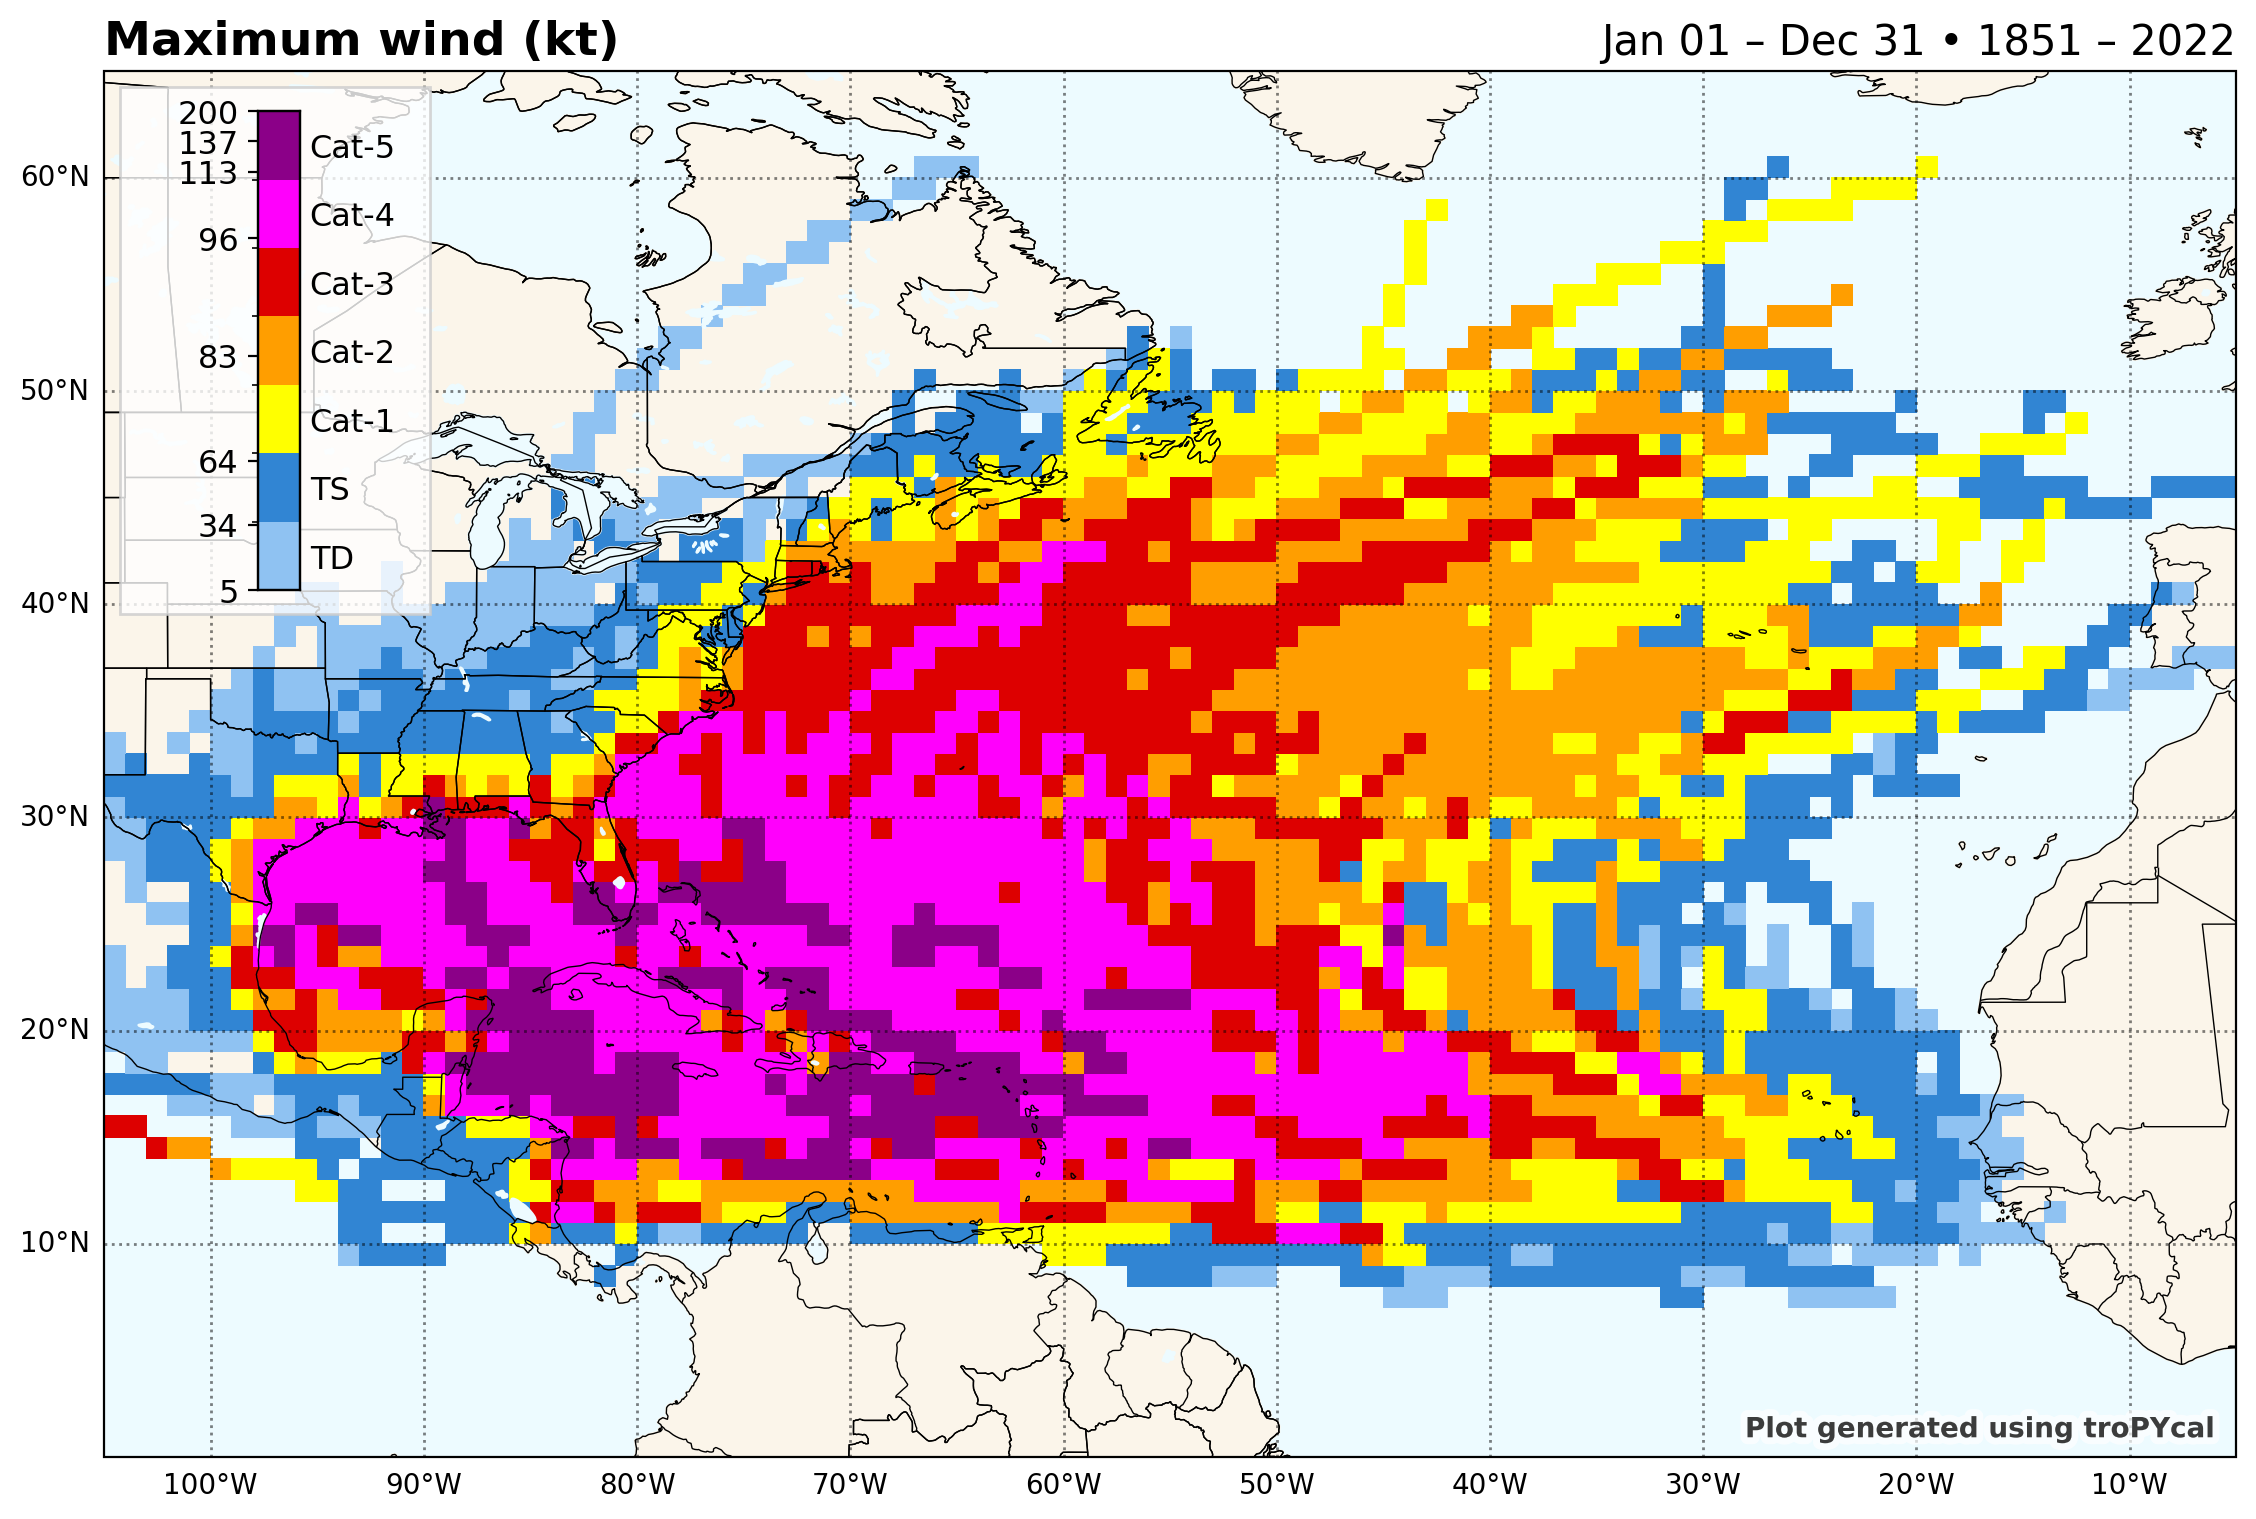

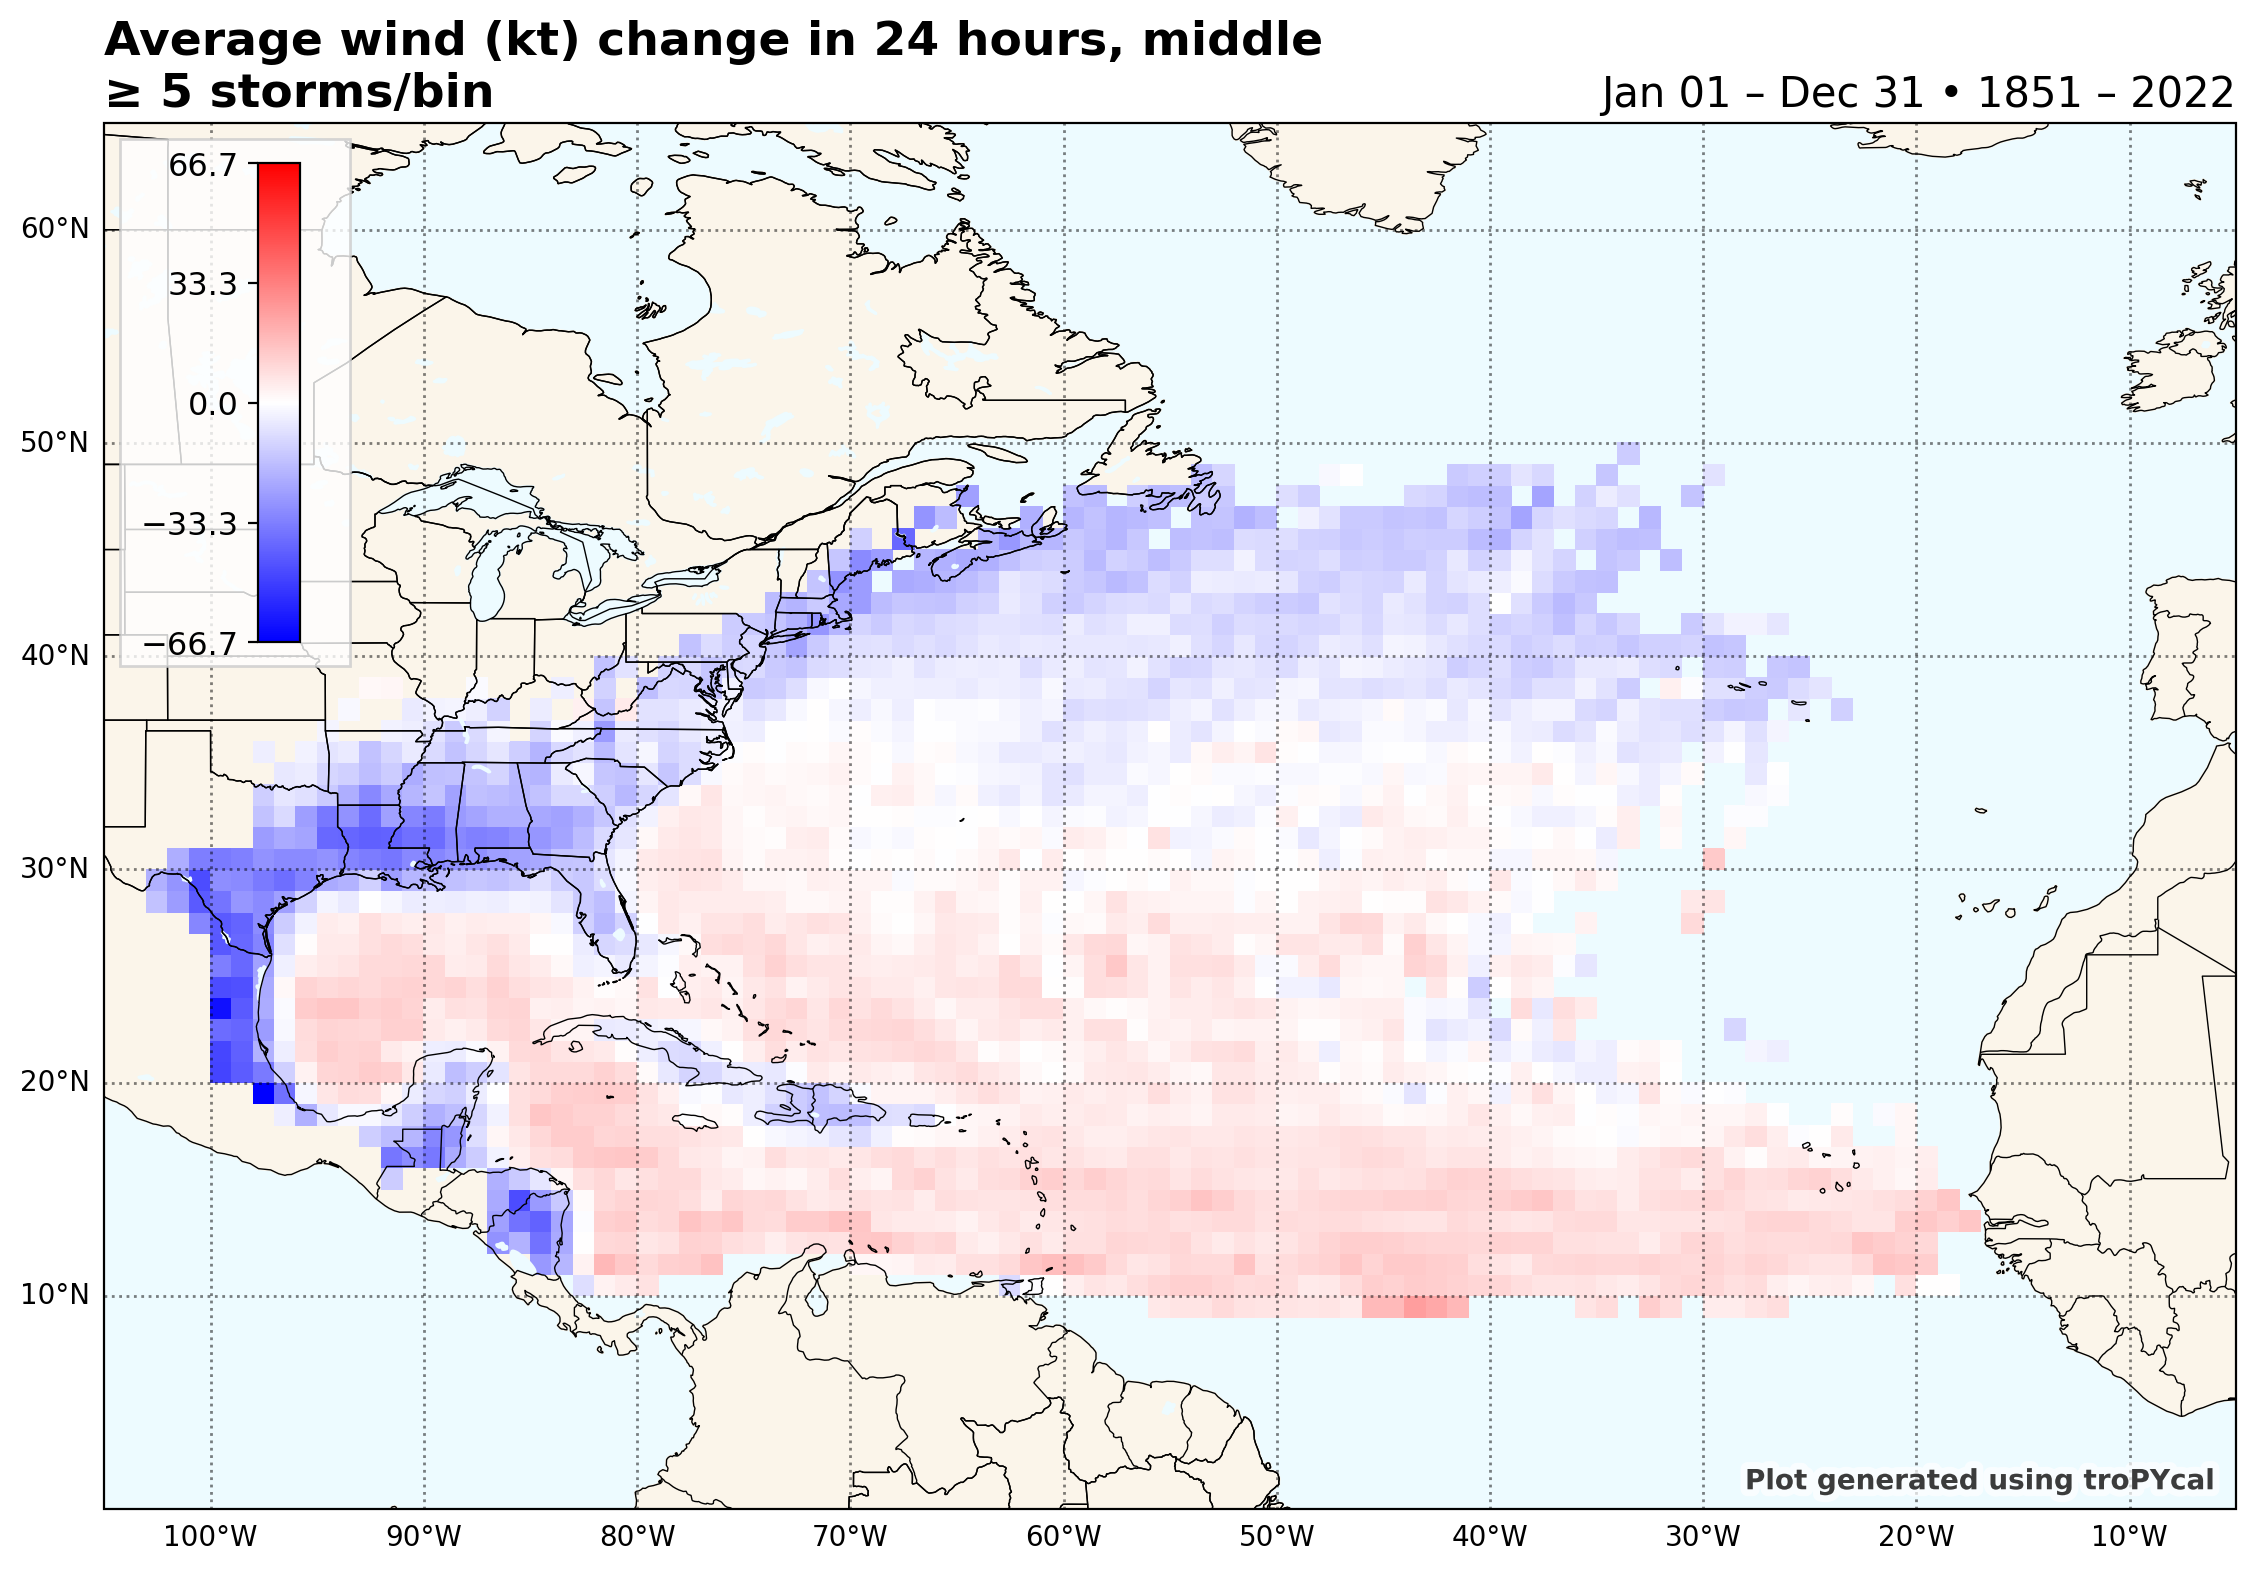

In [11]:
basin.gridded_stats(request="maximum wind")

# Let's look at the average change in sustained wind speed over a 24-hour period. By default, the value plotted is for the midpoint of the 24-hour period (so 12 hours preceding and following). We'll use the "prop" keyword argument to set the colormap to "bwr" and set the contour level range:

basin.gridded_stats(request="average wind change in 24 hours",prop={'cmap':'bwr','clevs':[-80,80]})

## IBTrACS Dataset

We can also read in IBTrACS data and use it the same way as we would use HURDAT2 data. There are caveats to using IBTrACS data, however, which are described more in depth in the :doc:`../data` page. We'll retrieve the global IBTrACS dataset, using the Joint Typhoon Warning Center (JTWC) data, modified with the Neumann reanalysis for southern hemisphere storms, and including a special reanalysis for Cyclone Catarina (2004) in Brazil.

<div class="alert alert-danger"><h4>Warning</h4><p>By default, IBTrACS data is read in from an online source. If you're reading in the global IBTrACS dataset, this could be quite slow. For global IBTrACS, it is recommended to have the CSV file saved locally (`link to data`_), then set the flag ``ibtracs_url="local_path"``.</p></div>




In [12]:
ibtracs = tracks.TrackDataset(basin='all',source='ibtracs',ibtracs_mode='jtwc_neumann',catarina=True)

--> Starting to read in ibtracs data
--> Completed reading in ibtracs data (40.77 seconds)


In [13]:
ibtracs

<tropycal.tracks.Dataset>
Dataset Summary:
    Basin:             all
    Source:            ibtracs, jtwc_neumann
    Number of storms:  8255
    Maximum wind:      185 knots (Nancy 1961)
    Minimum pressure:  872 hPa (Patricia 2015)
    Year range:        1851 — 2023

In its current form, tropycal is not configured to support all types of analyses for global IBTrACS, particularly near the dateline. Future updates will work to improve this functionality.

Let's make a plot of the maximum sustained wind of TCs globally:



maximum wind
--> Getting filtered storm tracks
--> Grouping by lat/lon/storm
--> Generating plot


<GeoAxes: title={'left': 'Maximum wind (kt)', 'right': 'Jan 01 – Dec 31 • 1851 – 2023'}>

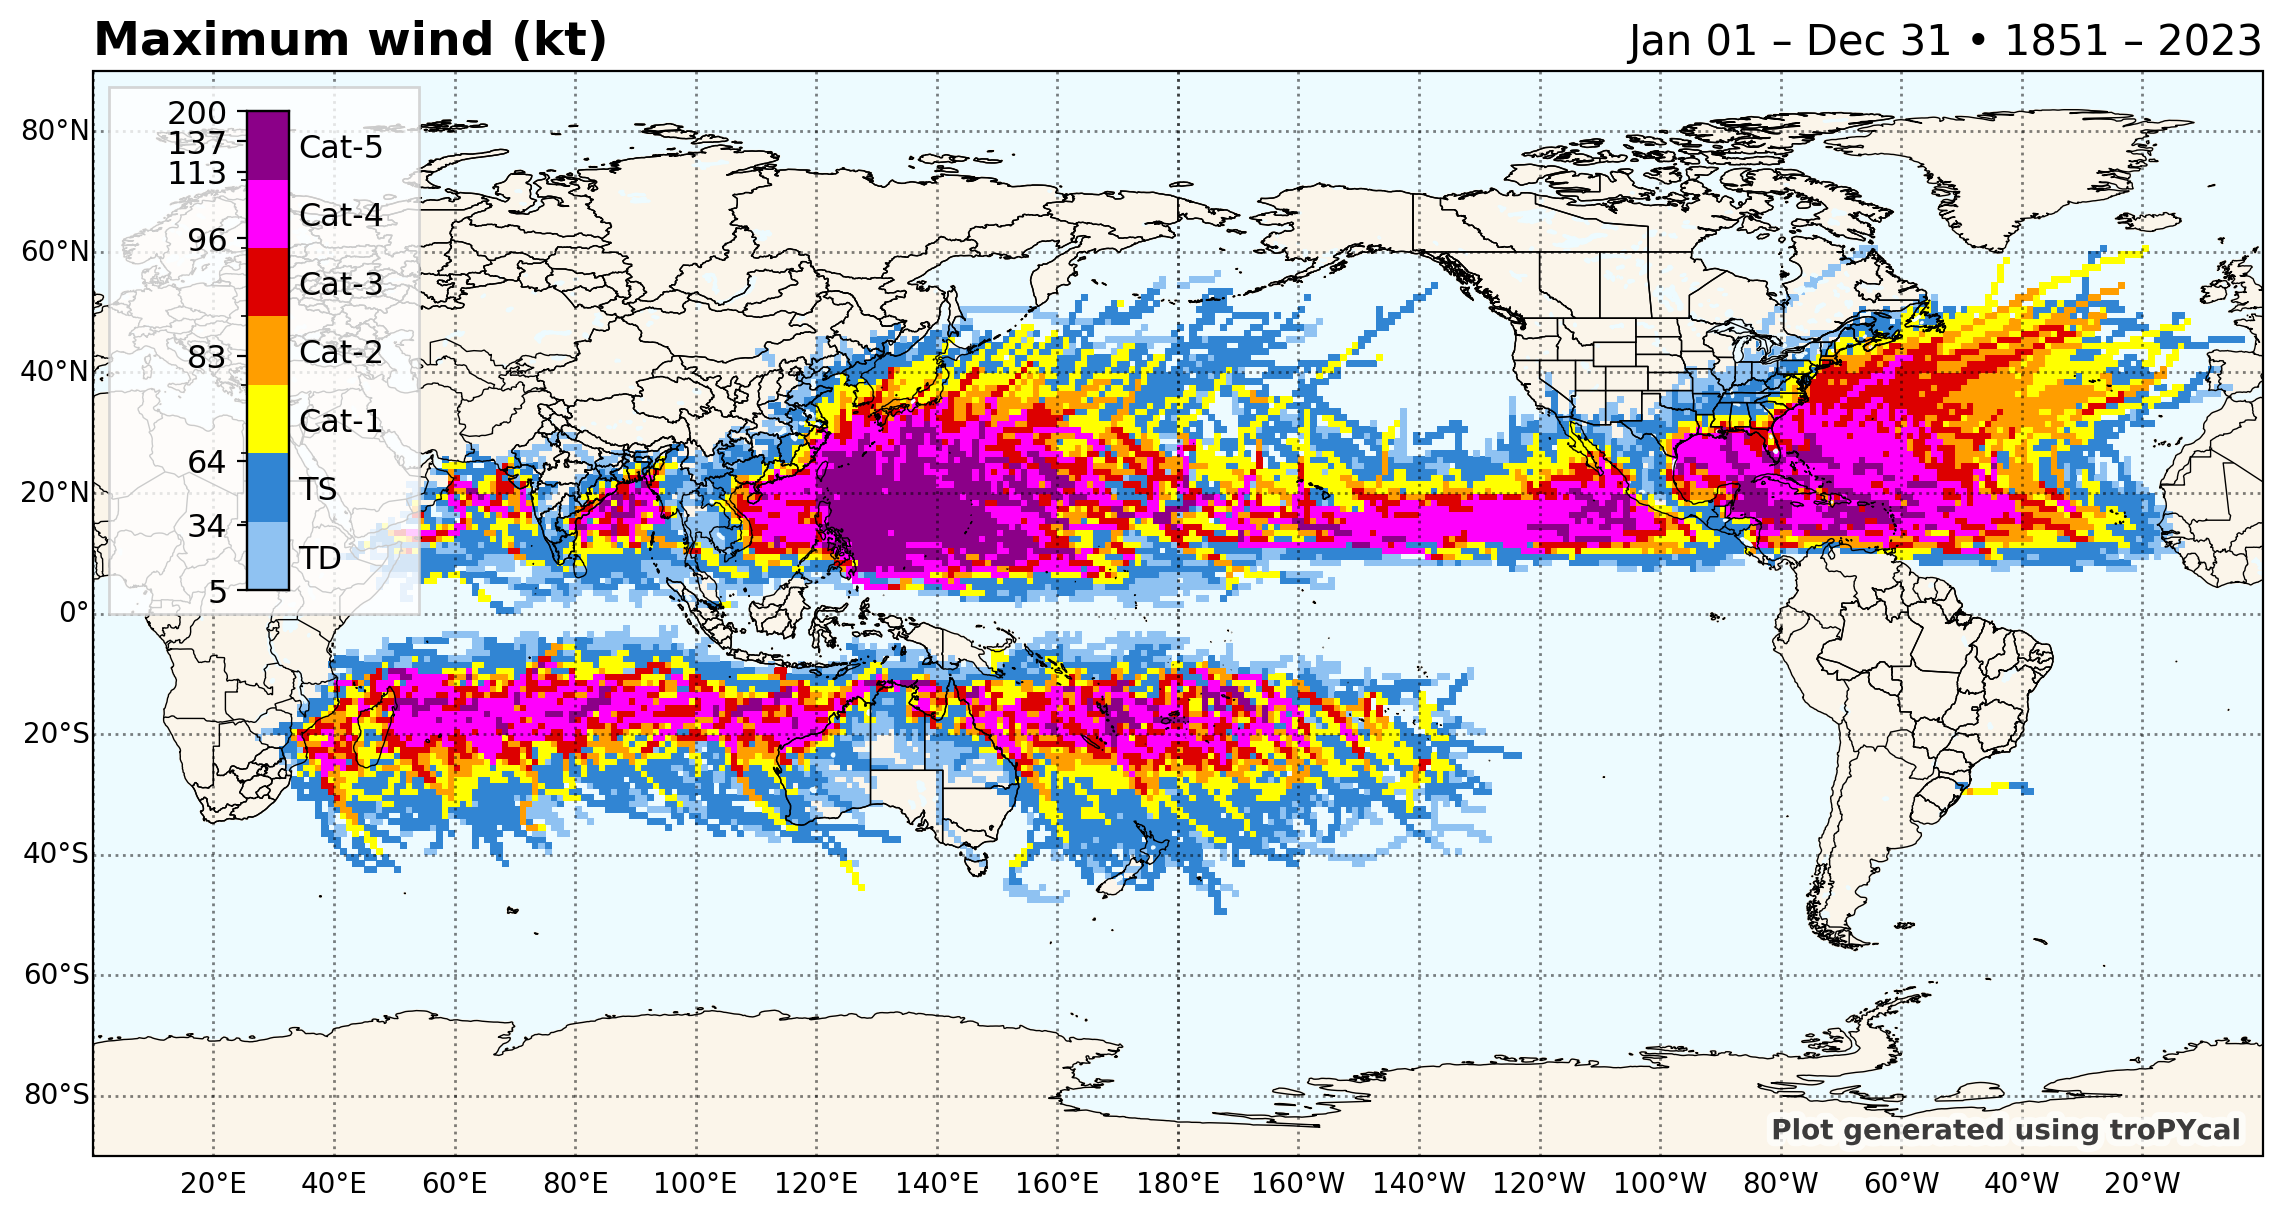

In [14]:
ibtracs.gridded_stats(request="maximum wind")

Make a plot of the total number of storms per 1 degree gridbox worldwide:



number of storms
--> Getting filtered storm tracks
--> Grouping by lat/lon/storm
--> Generating plot


<GeoAxes: title={'left': 'Number of storms', 'right': 'Jan 01 – Dec 31 • 1851 – 2023'}>

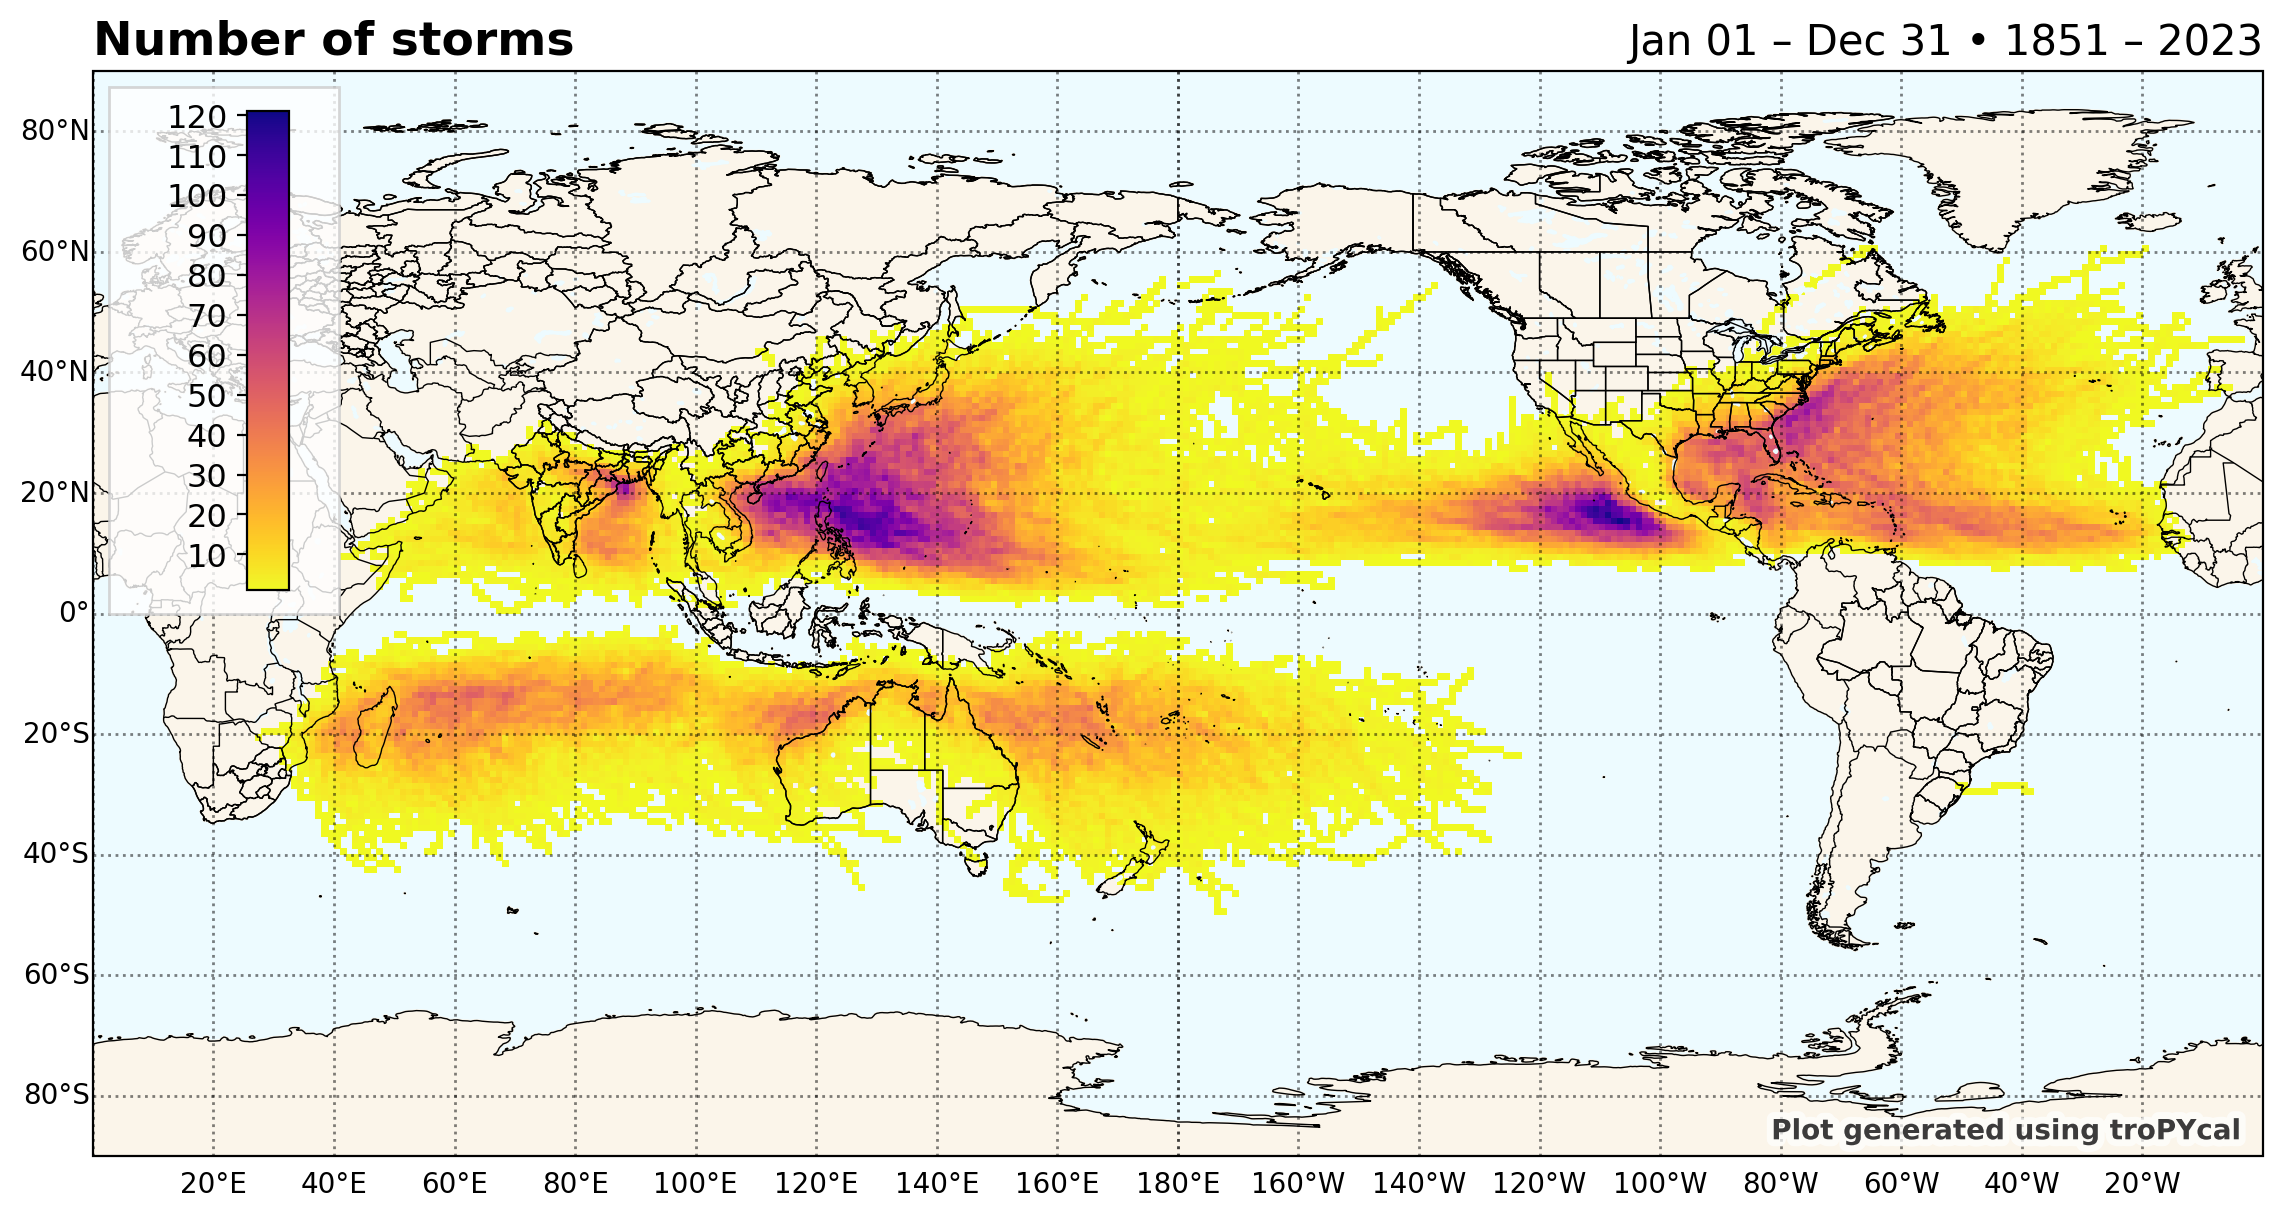

In [15]:
ibtracs.gridded_stats(request="number of storms",prop={'cmap':'plasma_r'})

Make a plot of the total number of rapidly intensifying storms (>=30 kt over 24 hours) per 1 degree gridbox:



number of storms
--> Getting filtered storm tracks
--> Grouping by lat/lon/storm
--> Generating plot


<GeoAxes: title={'left': 'Number of storms\n≥ 30kt / 24hr', 'right': 'Jan 01 – Dec 31 • 1851 – 2023'}>

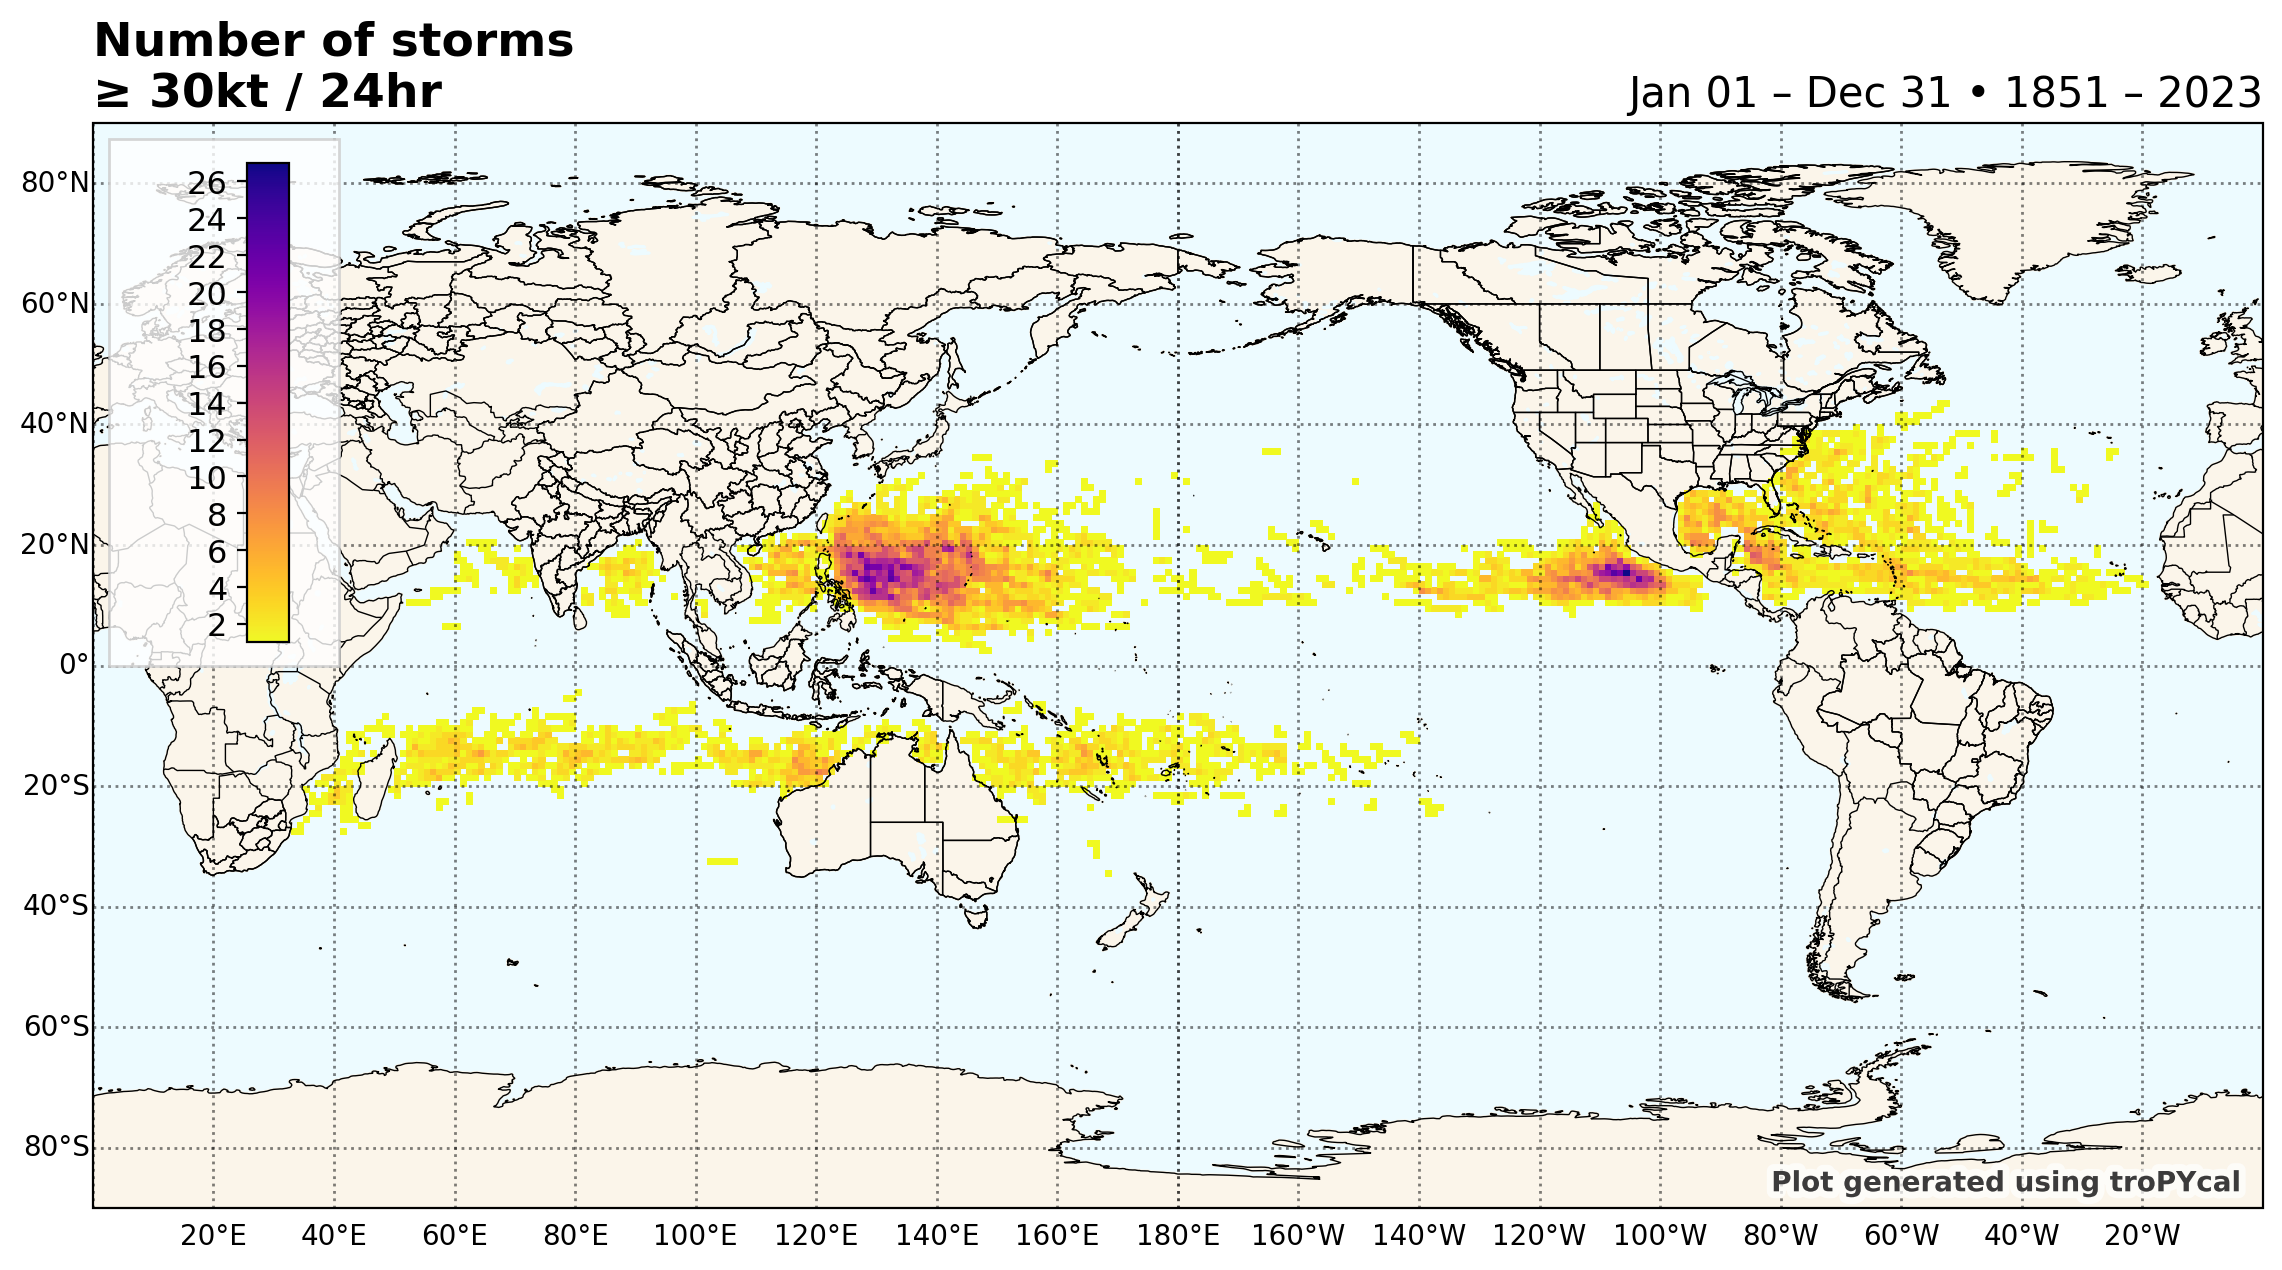

In [16]:
ibtracs.gridded_stats(request="number of storms",thresh={'dv_min':30},prop={'cmap':'plasma_r'})